# Data Analysis and Preprocessing For CreditCard
##### Workflow:
 * Data Loading and Basic Inspaction
 * Data Cleaning with Custom Module

##### Data Loading and Basic Inspaction

In [2]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..")

In [3]:
credit_df=pd.read_csv("../data/raw/creditcard.csv")
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_df.info() # produce concise summery for the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credit_df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

* There is no non Numerical column 

In [6]:
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* There is no missing value

In [7]:
credit_df.duplicated().sum()

1081

* we got dupliactes we should clean it 

#### Data Cleaning with Custom Module
* drop duplicates


In [8]:
# import custom module 
from src.creditcrd_cleaning import CreditCardCleaner
cleaner=CreditCardCleaner()
credit_df=cleaner.clean(credit_df)

In [9]:
credit_df.duplicated().sum() # check duplicates after cleaning

0

#### Exploratory Data Analysis
 * Univariate analysis: distributions of key variables
 * Bivariate analysis: relationships between features and target
 * Class distribution analysis: quantify the imbalance

#### A. Univariate Analysis

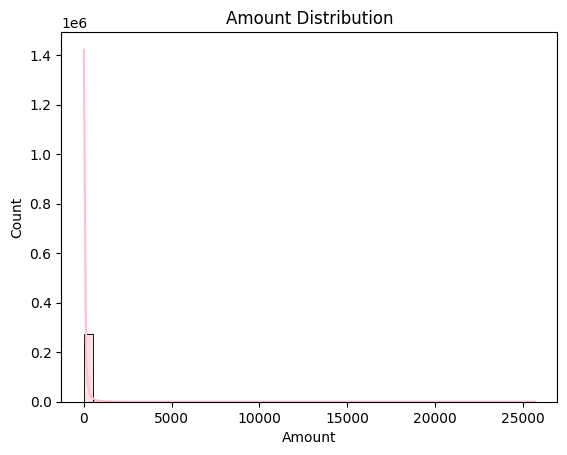

In [10]:
# Distribution Plot for Amount
sns.histplot(credit_df['Amount'], bins=50 ,color='pink',kde=True)
plt.title("Amount Distribution")
plt.show()

##### Insights from Amount Distribution
1. Distribution is Highly Skewed
   * The vast majority of transactions or items fall into the lowest amount bracket (0–5,000).
2. Frequency drops sharply as the amount increases.

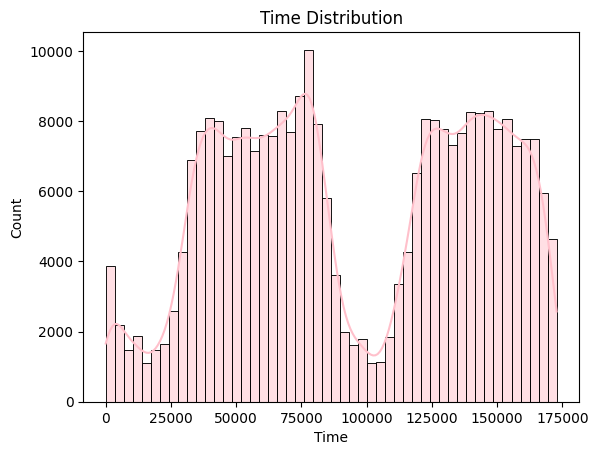

In [11]:
# Distibution plot for Time
sns.histplot(credit_df['Time'], bins=50 ,color='pink',kde=True)
plt.title("Time Distribution")
plt.show()

#### Insights from Time Distribution
* The time range spans 0 to ~175,000 seconds.
* 175,000 seconds ≈ 48.6 hours.
* This indicates the dataset covers roughly two days of transaction activity.

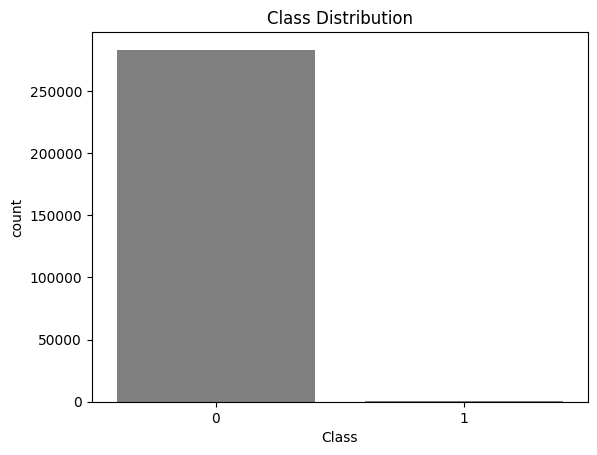

In [12]:
# Count Plot for class feature
sns.countplot(x='Class',data=credit_df ,color="grey")
plt.title("Class Distribution")
plt.show()

* Insights From the Count Plot For of Class
  * Non-fraudulent transactions dominate the dataset (tallest bar)
  * Fraudulent transactions are a tiny fraction (very short bar)
  * This is typical for fraud detection datasets - fraud is rare

#### B.Bivariate analysis

In [13]:
credit_df.groupby('Class')["Amount"].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,283253.0,88.413575,250.379023,0.0,5.67,22.00,77.46,25691.16
1,473.0,123.871860,260.211041,0.0,1.00,9.82,105.89,2125.87


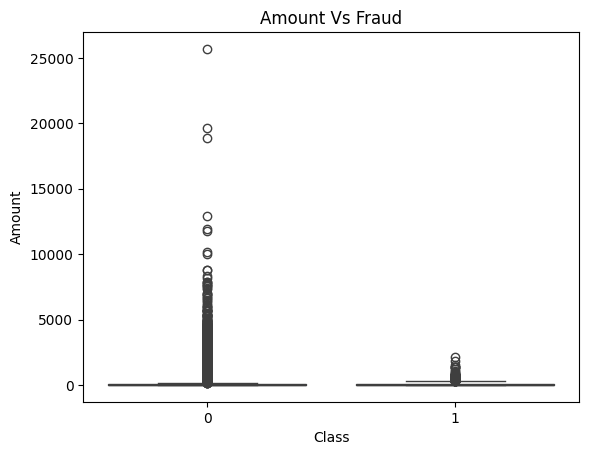

In [14]:
# Class Vs Amount
sns.boxplot(x='Class', y='Amount',data=credit_df)
plt.title('Amount Vs Fraud')
plt.show()

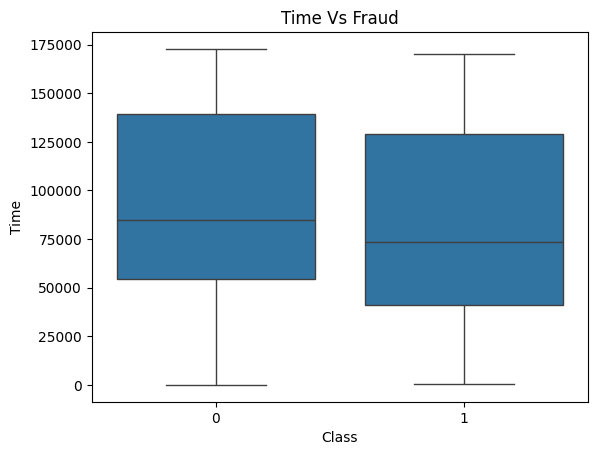

In [15]:
# Class Vs Amount
sns.boxplot(x='Class', y='Time',data=credit_df)
plt.title('Time Vs Fraud')
plt.show()

In [16]:
# save cleaned credit card dataset
credit_df.to_csv("../data/processed/creditcard_cleaned.csv",index=False)